<a href="https://colab.research.google.com/github/madhuribonela/Hotel-booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Have you ever wondered when the besttime of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

# <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

# <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

---



---

## ✈

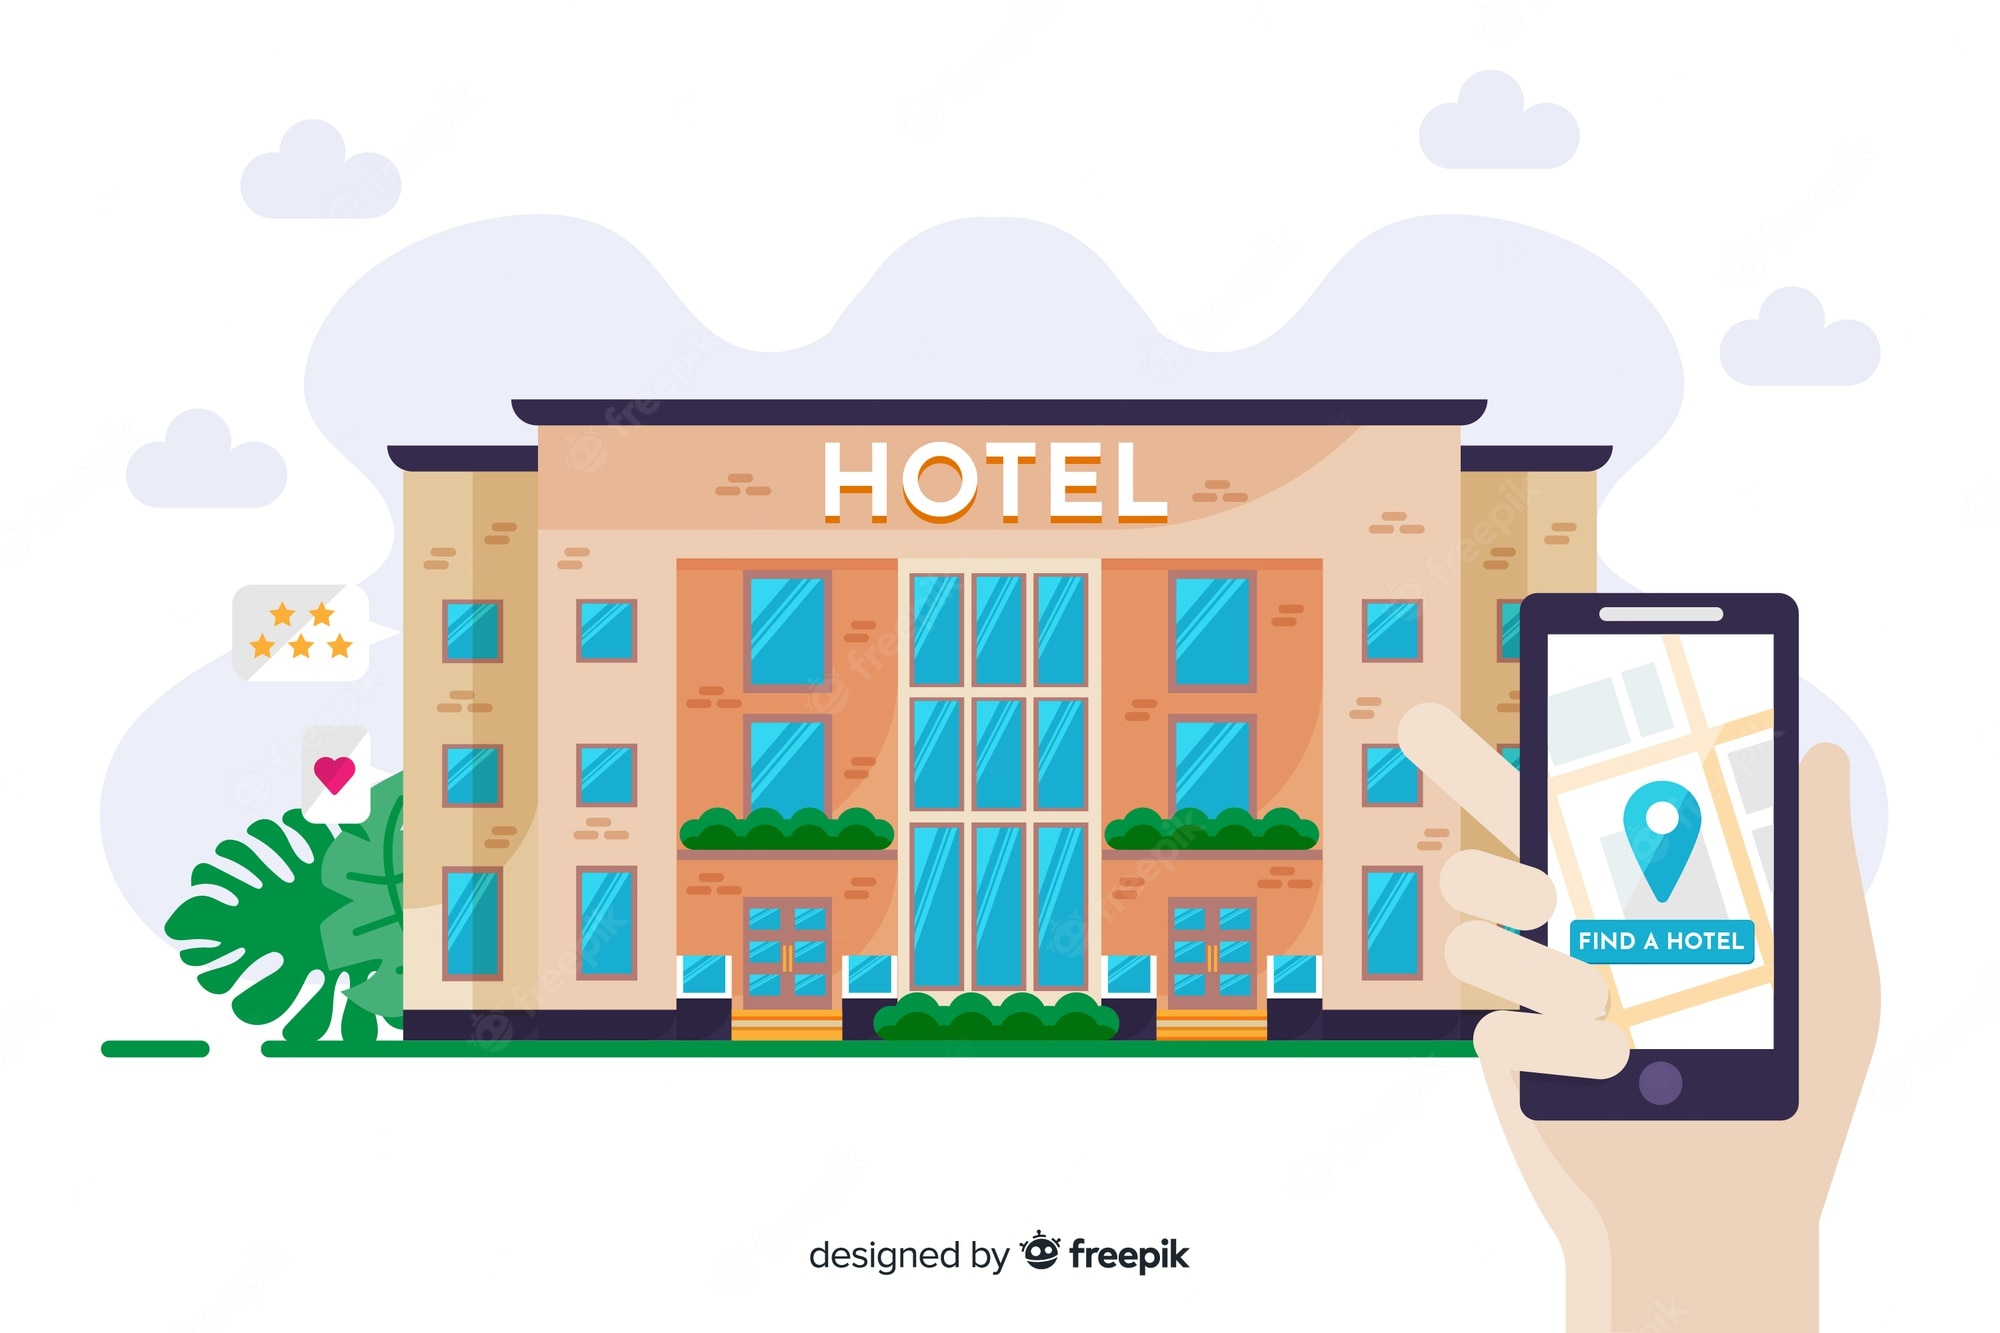

# **Importing Libraries**

---



---



In [1]:
# importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **What is used of libraries which we have imported?**

##**1) PANDAS ✈** 
Pandas is mainly used for data analysis and associated manipulation of tabular data in Dataframes. Pandas allows importing data from various file formats such as comma-separated values, JSON, Parquet, SQL database tables or queries, and Microsoft Excel.

##  **2) NUMPY ✈** 
NumPy is a library for Python that adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

## **3)MATPLOTLIB.PYPLOT ✈**
Matplotlib is a library in Python and it is numerical – mathematical extension for NumPy library. Pyplot is a state-based interface to a Matplotlib module which provides a MATLAB-like interface. There are various plots which can be used in Pyplot are Line Plot, Contour, Histogram, Scatter, 3D Plot, etc.

## **4)seaborn ✈**
It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.

## **5)%matplotlib inline ✈**
We can use the magic function %matplotlib inline to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written


---



# **Mounting Drive to featch Data set**

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Assign file location (.CSV file)**

---



In [4]:
File_location="/content/drive/MyDrive/Capstone projects/Hotel booking Analysis/Hotel Bookings.csv"
DF=pd.read_csv(File_location)

# **Data information about data set**

---





> **Cheacking first five rows**





In [5]:
DF.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03






> min, max values,mean values etc.







In [6]:
DF.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


# **Data Description:**

---



**1.hotel :** Hotel(Resort Hotel or City Hotel)

**2.is_canceled :**Value indicating if the booking was canceled (1) or not (0)

**3.lead_time :**Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**4.arrival_date_year :** Year of arrival date

**5.arrival_date_month :** Month of arrival date

**6.arrival_date_week_number :**Week number of year for arrival date

**7.arrival_date_day_of_month :** Day of arrival date

**8.stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**9.stays_in_week_nights :** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**10.adults :** Number of adults

**11.children :**Number of children

**12.babies :** Number of babies

**13.meal :**Type of meal booked. Categories are presented in standard hospitality meal packages:

**14.country :** Country of origin.`

**15.market_segment :** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**16.Distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**17.is_repeated_guest :** Value indicating if the booking name was from a repeated guest (1) or not (0)

**18.previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

**19.previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

**20.reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**21.assigned_room_type :** Code for the type of room assigned to the booking.

**22.booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**23.deposit_type :** Indication on if the customer made a deposit to guarantee the booking.

**24.agent :** ID of the travel agency that made the booking

**25.company :** ID of the company/entity that made the booking or responsible for paying the booking.

**26.days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer

**27.customer_type :** Type of booking, assuming one of four categories

**28.adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**29.required_car_parking_spaces :** Number of car parking spaces required by the customer

**30.total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor)

**31.reservation_status :** Reservation last status, assuming one of three categories

 * Canceled – booking was canceled by the customer
 * Check-Out – customer has checked in but already departed
 * No-Show – customer did not check-in and did inform the hotel of the reason   whyList item




In [8]:
DF.shape

(119390, 32)

# **Data Cleaning**


---



---



# **> checking for the duplicate rows**

---





In [9]:
DF.duplicated().value_counts()    #true means duplicate rows

False    87396
True     31994
dtype: int64

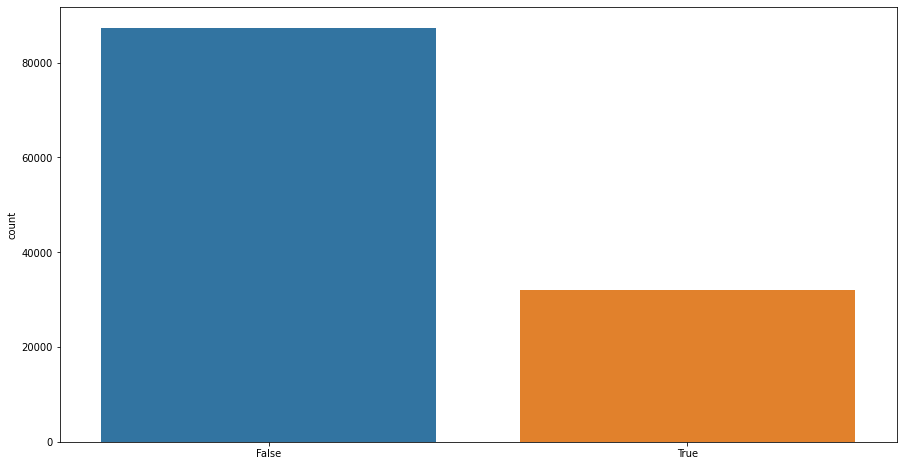

In [10]:

#from pandas._libs.hashtable import value_count
plt.figure(figsize=(15,8))
sns.countplot(x=DF.duplicated())



> So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

> dropping the duplicate rows



In [11]:
DF= DF.drop_duplicates()



> data set reduced



In [12]:
DF.shape #data set reduced

(87396, 32)


## > **Checking for Null Values**

---





In [13]:
DF.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


# **So we Have Null values in columns- Company, agent, Country,children.**

---



**1.for company and agent I will fill the Missing values with Zero (0)**

**2.for country we will fill Missing values with boject 'others'.**

**3.AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.** 

In [14]:
null_columns=['agent','children','company']
for col in null_columns:
  DF[col].fillna(0,inplace=True)                   # Filling/replacing null values with 0.

  DF['country'].fillna('others',inplace=True)     # Replacing NA values with 'others'

DF.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


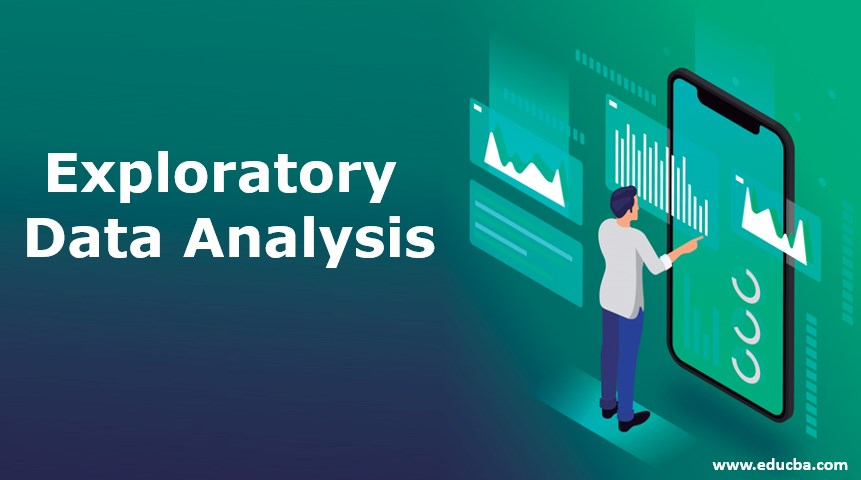

# **EDA (Exploratory Data Analysis)**

---



---



# **1) Hotel Type**

---



In [15]:
DF.hotel.value_counts(normalize=True)

City Hotel      0.611332
Resort Hotel    0.388668
Name: hotel, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


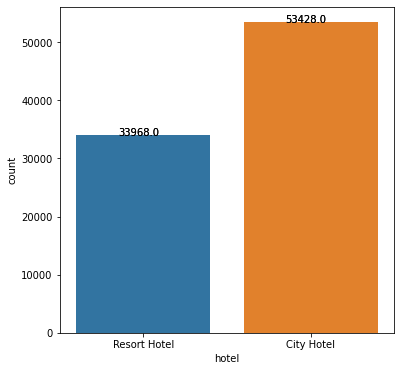

In [16]:
#we can see the hotel type count in graph
plt.figure(figsize=(6 ,6))
sns.countplot(DF['hotel'], palette='husl')
ax = sns.countplot(x="hotel", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.90))
plt.show()

# **2)Cancelled bookings**

---



In [17]:
print('Total Bookings cancelled')
print(DF.is_canceled.value_counts())
print('Cancelation percentage')
print(DF.is_canceled.value_counts(normalize=True))

#During the year, we have a 27.13% of cancelations.




Total Bookings cancelled
0    63371
1    24025
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.725102
1    0.274898
Name: is_canceled, dtype: float64


## **During the year, we have a 27.48% of cancelations.**


## **Now lets plot this result.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


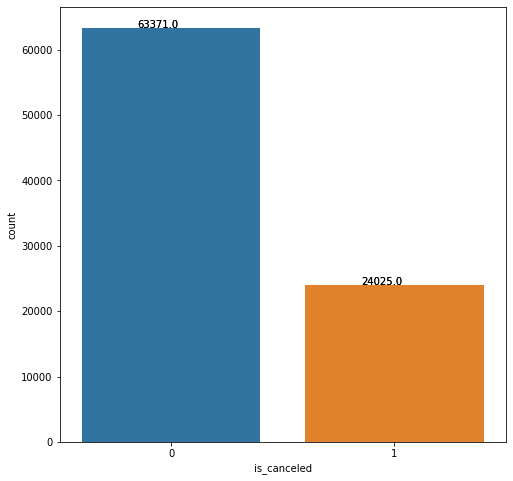

In [18]:
plt.figure(figsize=(8,8))

#Canceled=1, Not canceled= 0
sns.countplot(DF['is_canceled'], palette='husl')
ax = sns.countplot(x="is_canceled", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.90))
plt.show()

## **3)Average Daily Rate (ADR) :- dividing the sum of all lodging transactions by the total number of staying nights**

---



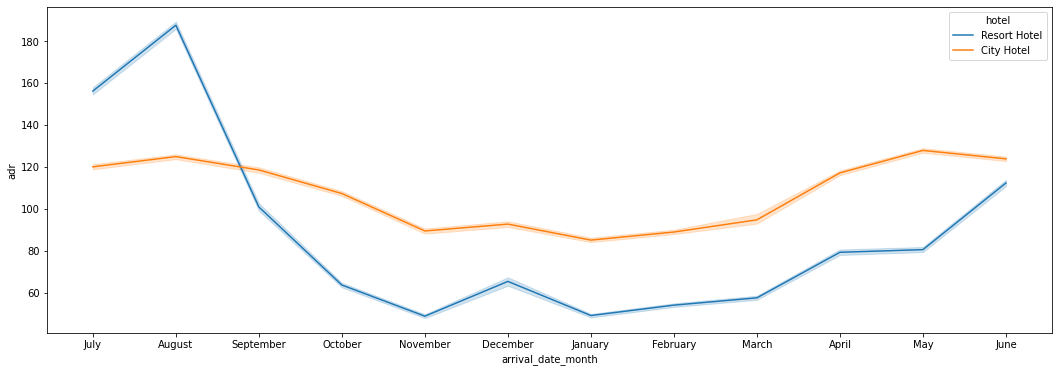

In [19]:
#Average Daily Rate (ADR)
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= DF)


plt.show()

**1.For resort hotels, the average daily rate is more expensive during august, july and september.**

**2.For city hotels, the average daily rate is more expensive during august, july, june and may.**

# **4)Now lets check the arrival date by months**

---



In [20]:
DF.arrival_date_month.value_counts(normalize=True)

August       0.128805
July         0.115074
May          0.095599
April        0.090485
June         0.088848
March        0.085965
October      0.079340
September    0.076548
February     0.069774
December     0.058710
November     0.057154
January      0.053698
Name: arrival_date_month, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


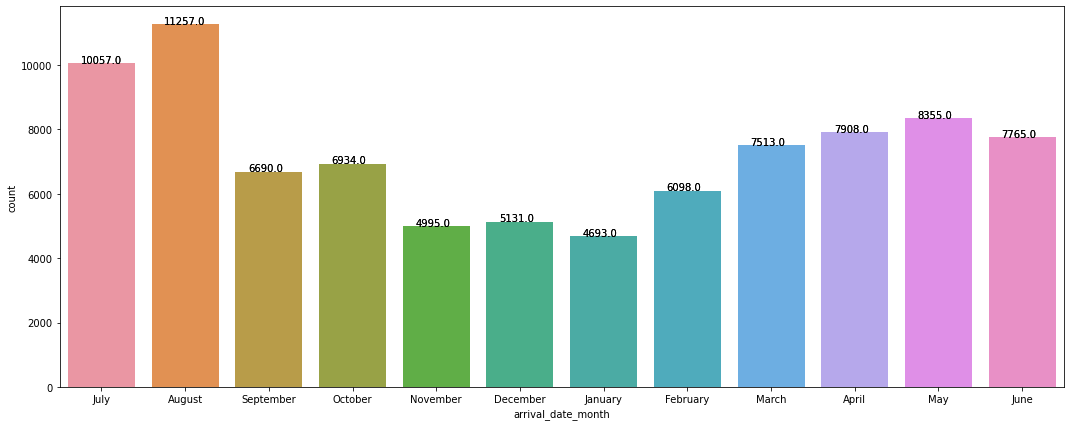

In [21]:
plt.figure(figsize=(18,7))
sns.countplot(DF['arrival_date_month'], palette='husl')
ax = sns.countplot(x="arrival_date_month", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1.90))
plt.show()

# **5)Market Segment**
  Lets check the Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

---



In [22]:
DF.market_segment.value_counts(normalize=True)



Online TA        0.590622
Offline TA/TO    0.158920
Direct           0.135063
Groups           0.056547
Corporate        0.048194
Complementary    0.008032
Aviation         0.002597
Undefined        0.000023
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


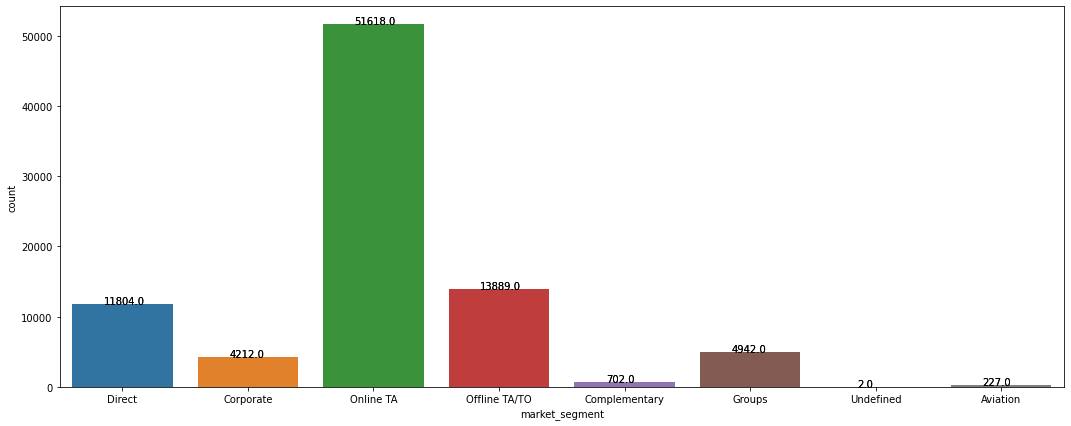

In [23]:
plt.figure(figsize=(18,7))
sns.countplot(DF['market_segment'], palette='husl')
ax = sns.countplot(x="market_segment", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1.90))
  

plt.show()

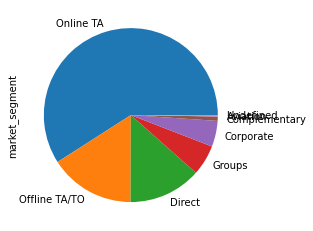

In [24]:
DF.market_segment.value_counts(normalize=True).plot.pie()

# **6) Year of arrival date**

---



In [25]:
#Year of arrival date
DF.arrival_date_year.value_counts(normalize=True)

2016    0.485045
2017    0.362625
2015    0.152330
Name: arrival_date_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


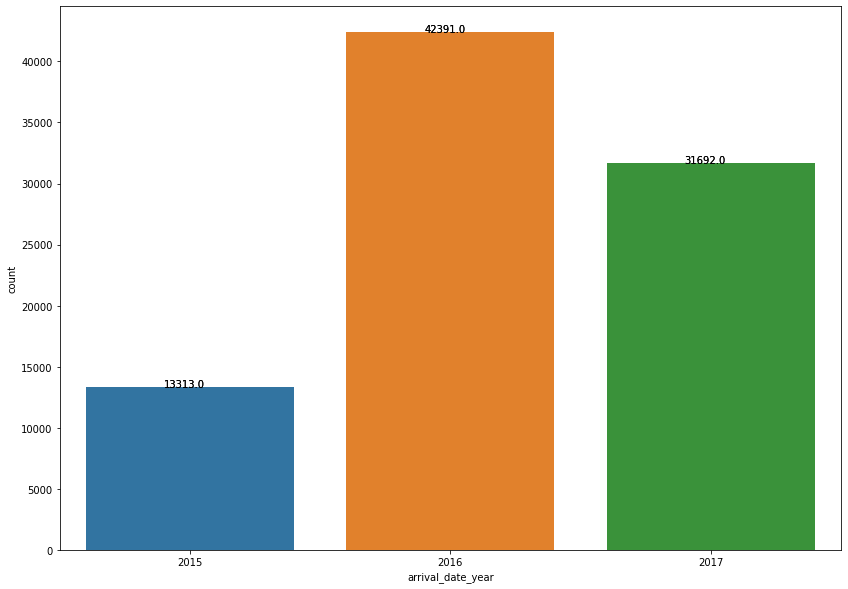

In [26]:
plt.figure(figsize=(14,10))
sns.countplot(DF['arrival_date_year'], palette='husl')
ax = sns.countplot(x="arrival_date_year", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1.90))
plt.show()

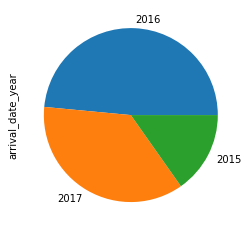

In [27]:
 DF.arrival_date_year.value_counts(normalize=True).plot.pie()

# **7)Customer Type**

---



In [28]:
DF.customer_type.value_counts(normalize=True)

Transient          0.823676
Transient-Party    0.134182
Contract           0.035917
Group              0.006225
Name: customer_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


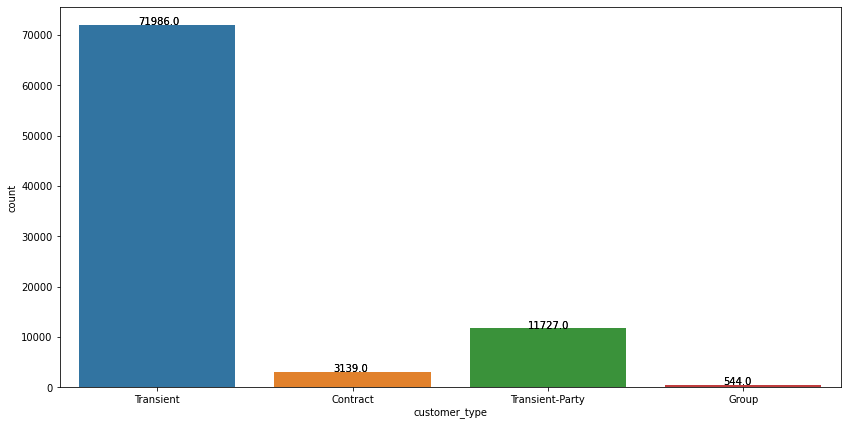

In [29]:
plt.figure(figsize=(14,7))
sns.countplot(DF['customer_type'], palette='husl')
ax = sns.countplot(x="customer_type", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1.90))
plt.show()

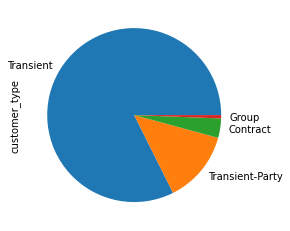

In [30]:
DF.customer_type.value_counts(normalize=True).plot.pie()

**Type of booking, assuming one of four categories:**

**a)Contract - when the booking has an allotment or other type of contract associated to it;**

**b)Group – when the booking is associated to a group;**

**c)Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;**

**d)Transient-party – when the booking is transient, but is associated to at least other transient booking**

# **8)Distribution Channel**

---



In [31]:
DF.distribution_channel.value_counts(normalize=True)

TA/TO        0.791123
Direct       0.148611
Corporate    0.058138
GDS          0.002071
Undefined    0.000057
Name: distribution_channel, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


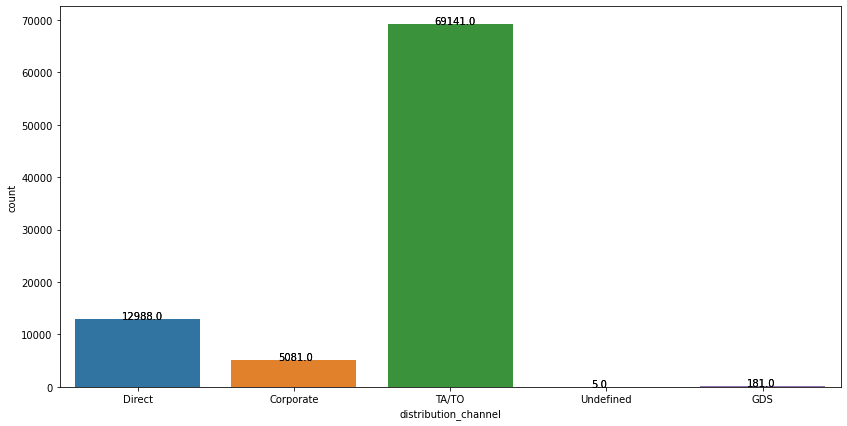

In [32]:
plt.figure(figsize=(14,7))
sns.countplot(DF['distribution_channel'], palette='husl')
ax = sns.countplot(x="distribution_channel", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1.90))

plt.show()

#Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

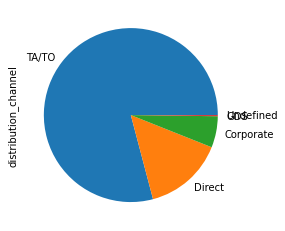

In [33]:
DF.distribution_channel.value_counts(normalize=True).plot.pie()

# **9)Repeated Guest**

---



In [34]:
DF.is_repeated_guest.value_counts(normalize=True)

0    0.960925
1    0.039075
Name: is_repeated_guest, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


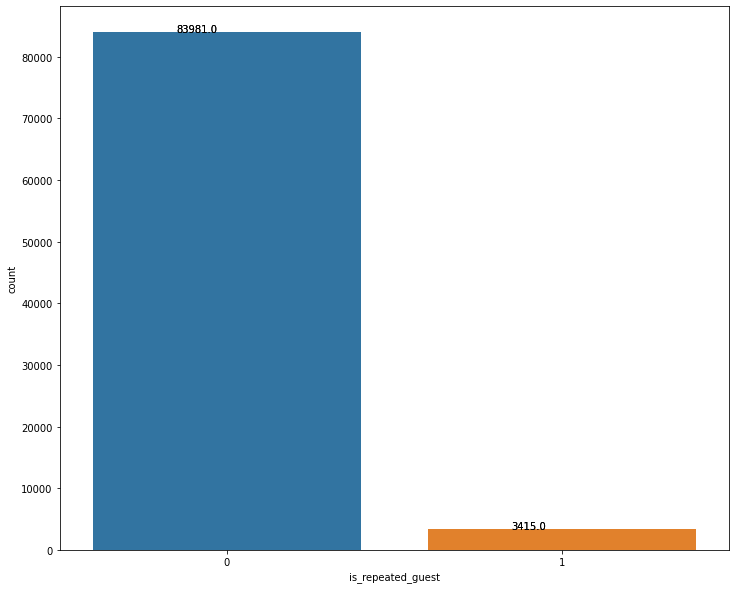

In [35]:
plt.figure(figsize=(12,10))
sns.countplot(DF['is_repeated_guest'], palette='husl')
ax = sns.countplot(x="is_repeated_guest", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.90))


plt.show()

# **Check if the booking name was from a repeated guest (1) or not (0)**

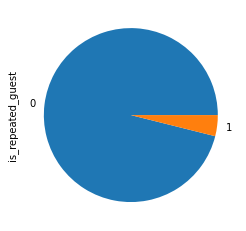

In [36]:
DF.is_repeated_guest.value_counts(normalize=True).plot.pie()

# **10) which are the months of highest and least occupation?**

---



In [37]:
#Total members per reservation
DF.arrival_date_month.value_counts(normalize=True)


August       0.128805
July         0.115074
May          0.095599
April        0.090485
June         0.088848
March        0.085965
October      0.079340
September    0.076548
February     0.069774
December     0.058710
November     0.057154
January      0.053698
Name: arrival_date_month, dtype: float64

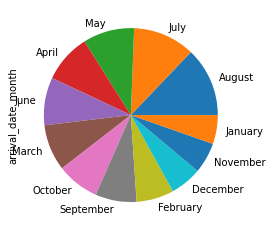

In [38]:
DF.arrival_date_month.value_counts(normalize=True).plot.pie()


## **The month of highest occupation is august with 11.66% of the reservations. The month of lest occupation is january with 4.90% of the reservations.**

# **11)Which is the most reserved room type?**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


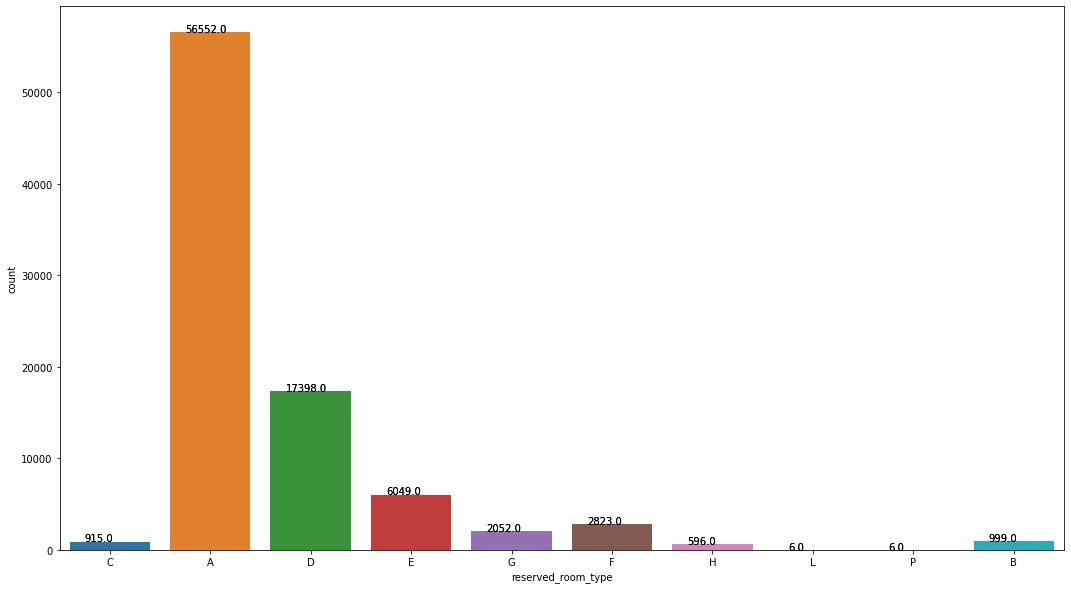

In [39]:
DF.reserved_room_type.value_counts()
plt.figure(figsize=(18,10))
sns.countplot(DF['reserved_room_type'], palette='husl')
ax = sns.countplot(x="reserved_room_type", data=DF)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.90))



In [40]:
DF.reserved_room_type.value_counts(normalize=True)
#A,D,E are the top 3 categorys of room that customer like the most.

A    0.647078
D    0.199071
E    0.069214
F    0.032301
G    0.023479
B    0.011431
C    0.010470
H    0.006820
L    0.000069
P    0.000069
Name: reserved_room_type, dtype: float64

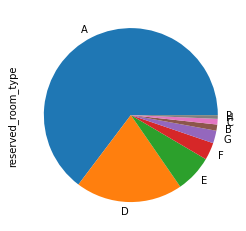

In [41]:
DF.reserved_room_type.value_counts(normalize=True).plot.pie()

# **Conclusion**

---

* City hotel got most of booking in last three years of time span.

* 	During the year, we have a 27.48% of cancelations.in that city hotels boking cancellation is more than resort hotel

* 	Resort hotels, the average daily rate is more expensive during august, July and September.

* 	For city hotels, the average daily rate is more expensive during august, July, June and may.

*	The arrivals of customers is more in the month of August and next month with more numbers of arrivals was in the month of July comparatively less arrivals in other months.

* Compared to other market segment designation online TA is high in range. With 56477.

* 	The number of arrivals in the year of 2016 is high with 56707 and the next year in 2017 is 40667

*	The frequency of customer repetition was low hotel need to have opportunity in that area where they can make improvements

*	The month of highest occupation is august with 11.62 % of the reservations. The month of lest occupation is January with 4.90 % of the reservations.

*	The most of reserved room by customer is type A category which is 72 %

